In [69]:
import librosa
from librosa.onset import onset_detect
from librosa.effects import trim, split
from librosa.util import fix_length
import numpy as np
from typing import List
import utils.constants as consts
from utils.displays import display_wave_form

In [70]:
# Load audio.
violin_sample: np.ndarray = librosa.load('../media/audio/perfect_blue.wav', consts.SAMPLE_RATE, mono = True)[0]

Pre onset trimming waveform

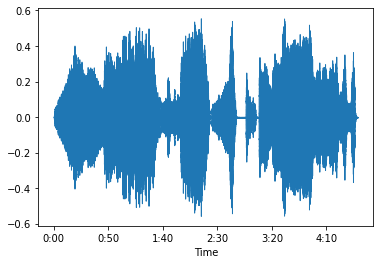

In [71]:
display_wave_form(violin_sample)

Trimmed waveform

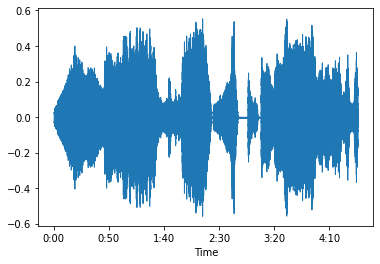

In [72]:
trimmed_sample, _ = trim(violin_sample, top_db = 28)

display_wave_form(trimmed_sample)

Windowing

In [ ]:
def window_signal(audio_signal: np.ndarray, window_step_size: int) -> np.ndarray:
    """
    :param audio_signal:
    :param window_step_size:
    :return:

    """

    if audio_signal.size < consts.SAMPLE_RATE:
        sample = fix_length(audio_signal, consts.SAMPLE_RATE)  # Pad audio with 0's if it's less than a second.

        return sample

    start_index = 0
    all_audio_clips: List[np.ndarray] = []

    while start_index < audio_signal.size:
        sample_clip: np.ndarray = audio_signal[start_index: start_index + consts.SAMPLE_RATE]
        all_audio_clips.append(sample_clip)
        start_index += window_step_size